In [5]:
from skimage import feature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import os
from pathlib import Path
import sys
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report, average_precision_score
from sklearn.metrics import precision_recall_curve

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
import xgboost as XGB


In [6]:
parent_folder = Path().resolve().parent
src_path = parent_folder / 'src'
sys.path.append(str(src_path))

from tools import get_embedding_birdnet

#env to use: clef

In [7]:
root_folder='C:/Users/dgnhk/Woodcock-CNN/data/train_data/embedding/birdnet/'

In [8]:
pos_embeddings = get_embedding_birdnet(root_folder, 1)
neg_embeddings = get_embedding_birdnet(root_folder, 0)

In [58]:
df_pos = pd.DataFrame(data=pos_embeddings)
df_pos['target'] = 1

df_neg = pd.DataFrame(data=neg_embeddings)
df_neg['target'] = 0
df_neg = df_neg.sample(frac=0.2, random_state=413)

In [59]:
df_combined = pd.concat([df_pos, df_neg], ignore_index=True, axis=0)
df_combined = df_combined.sample(frac=1, random_state=232)

In [60]:
#Generate Test and Train datasets
X = df_combined.iloc[:, :-1] #All values except the last column
y = df_combined.iloc[:, -1] #All values from the last column

train, test, train_target, test_target = train_test_split(X, y, test_size=0.20, random_state=424)

In [61]:
class Config:
    oversample = True
    undersample = False

oversampler = SMOTE()
undersampler = RandomUnderSampler()

if Config.oversample:
    train, train_target = oversampler.fit_resample(train, train_target)
elif Config.undersample:
    train, train_target = undersampler.fit_resample(train, train_target)
else: 
    print("Using the original dataset")

SVM

In [62]:
model = SVC(cache_size=500)
model.fit(train,train_target)

SVC(cache_size=500)

Test set average precision: 0.8553214202535571
              precision    recall  f1-score   support

           0     0.7442    0.9600    0.8384       100
           1     0.9592    0.7402    0.8356       127

    accuracy                         0.8370       227
   macro avg     0.8517    0.8501    0.8370       227
weighted avg     0.8645    0.8370    0.8368       227



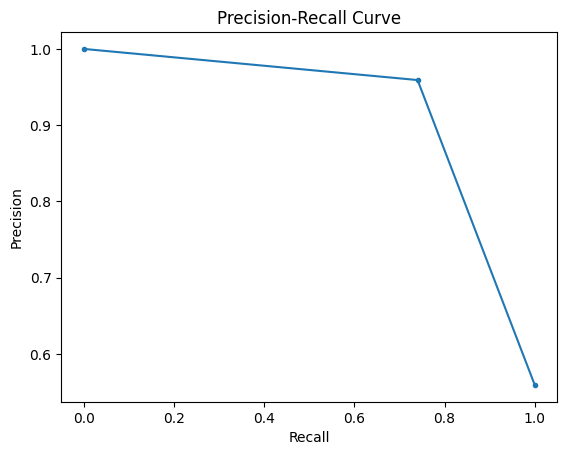

In [63]:
predictions = model.predict(test)
ap = average_precision_score(test_target, predictions)
print("Test set average precision:", ap)

report=classification_report(test_target, predictions, digits=4)
print(report)

# Only for binary classification (adjust for multi-class)
precision, recall, thr = precision_recall_curve(test_target, predictions)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Random Forest

In [64]:
model = RFC(n_jobs = -1)
model.fit(train,train_target)

RandomForestClassifier(n_jobs=-1)

Test set average precision: 0.8274803625706414
              precision    recall  f1-score   support

           0     0.7360    0.9200    0.8178       100
           1     0.9216    0.7402    0.8210       127

    accuracy                         0.8194       227
   macro avg     0.8288    0.8301    0.8194       227
weighted avg     0.8398    0.8194    0.8196       227



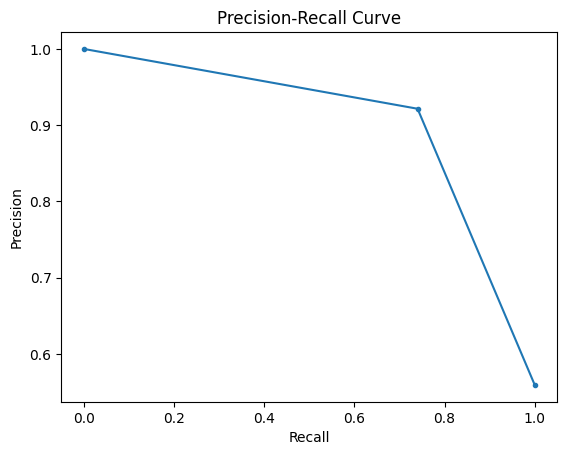

In [65]:
predictions = model.predict(test)
ap = average_precision_score(test_target, predictions)
print("Test set average precision:", ap)

report=classification_report(test_target, predictions, digits=4)
print(report)

# Only for binary classification (adjust for multi-class)
precision, recall, thr = precision_recall_curve(test_target, predictions)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

XGBoost

In [66]:
model = XGB.XGBClassifier(objective='binary:logistic')
model.fit(train,train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Test set average precision: 0.8147594760338353
              precision    recall  f1-score   support

           0     0.7417    0.8900    0.8091       100
           1     0.8972    0.7559    0.8205       127

    accuracy                         0.8150       227
   macro avg     0.8194    0.8230    0.8148       227
weighted avg     0.8287    0.8150    0.8155       227



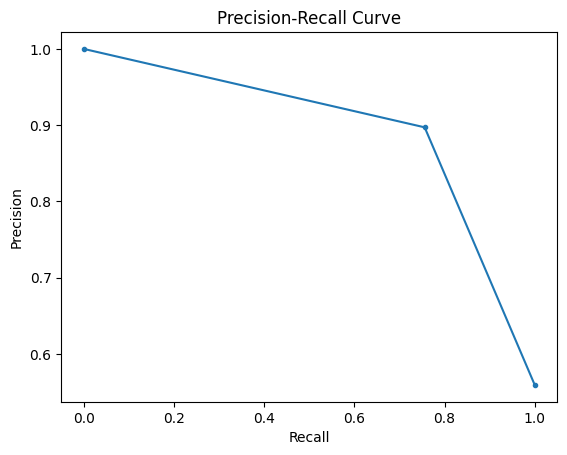

In [67]:
predictions = model.predict(test)
ap = average_precision_score(test_target, predictions)
print("Test set average precision:", ap)

report=classification_report(test_target, predictions, digits=4)
print(report)

# Only for binary classification (adjust for multi-class)
precision, recall, thr = precision_recall_curve(test_target, predictions)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()